In [2]:
import tensorflow as tf
import os

In [4]:
os.path.join('realdata', 'happy')
os.listdir('realdata')

['happy', 'Bald']

In [5]:
# Remove dodgy images
import cv2
import imghdr
from matplotlib import pyplot as plt

In [6]:
data_dir = 'realdata'

In [7]:
image_exts = ['jpeg','jpg','bmp','png']

In [10]:
img = cv2.imread(os.path.join('realdata','Bald','eu.04a53e8d-0642-47ce-afed-0dce3d2e3b85.jpg'))
img.shape

(4160, 3120, 3)

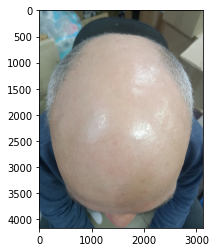

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)
        

Image not in ext list realdata/happy/56f455011e0000b300705475.jpeg
Image not in ext list realdata/happy/1rOrTgNQABn0P7dy3IrNDjg.jpeg
Image not in ext list realdata/happy/46326512.jpg
Image not in ext list realdata/happy/427394C200000578-0-image-a-24_1500384481554.jpg
Image not in ext list realdata/happy/2560px-Happy_People.jpg
Image not in ext list realdata/happy/guilherme-stecanella-375176-unsplash.jpg


In [13]:
# Load data
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, shape=(), dtype=int32)

  To proces

In [14]:
import numpy as np

In [19]:
data = tf.keras.utils.image_dataset_from_directory('realdata')

Found 175 files belonging to 2 classes.


In [20]:
data_iterator = data.as_numpy_iterator()

In [21]:
data_iterator

In [22]:
# Get another batch from the iterator
batch = data_iterator.next()

In [23]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [24]:
# Class 1 = Sad People
# Class 0 = Happy People 
batch[1]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

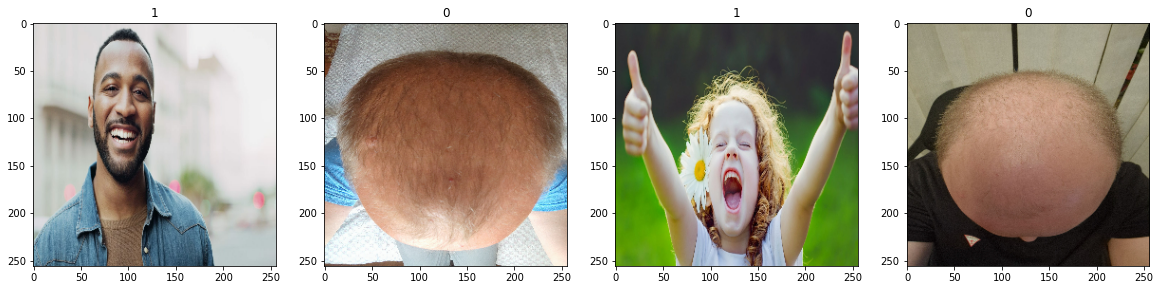

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [26]:
# Preprocess Data
# Scale data
data = data.map(lambda x, y: (x/225, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [27]:
scaled_iterator = data.as_numpy_iterator()

In [28]:
scaled_iterator

In [29]:
batch = scaled_iterator.next()

In [30]:
batch[0].max()

1.1333333

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


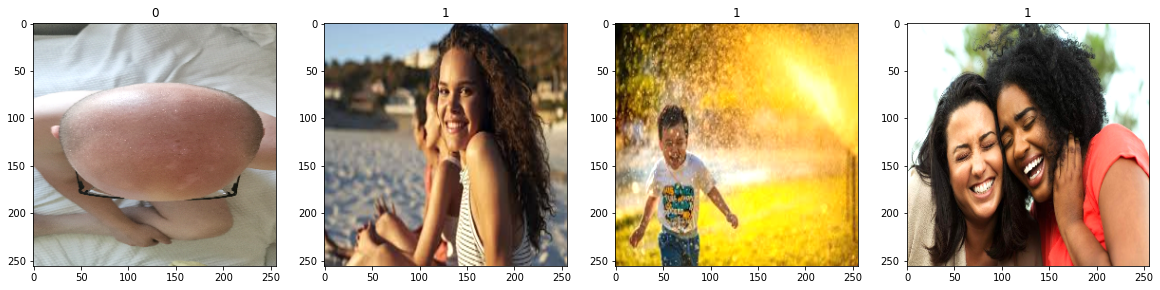

In [31]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [32]:
# Split data
len(data)

6

In [35]:
train_size = int(len(data)*.4)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.2)+1

In [36]:
train_size + val_size + test_size

6

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [38]:
# Build Deep learning model
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [40]:

model = Sequential()

In [41]:

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [42]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [43]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [44]:
# Train with the implemented model

logdir = 'logs'

In [45]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [46]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
2/2 [==============================] - 3s 1s/step - loss: 1.0815 - accuracy: 0.6875 - val_loss: 1.0559 - val_accuracy: 0.6719
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.6254 - accuracy: 0.6875 - val_loss: 0.6598 - val_accuracy: 0.7500
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.6659 - accuracy: 0.6406 - val_loss: 0.5606 - val_accuracy: 0.9219
Epoch 4/20
2/2 [==============================] - 3s 1s/step - loss: 0.4773 - accuracy: 0.9062 - val_loss: 0.4571 - val_accuracy: 0.7656
Epoch 5/20
2/2 [==============================] - 3s 1s/step - loss: 0.4761 - accuracy: 0.7344 - val_loss: 0.4509 - val_accuracy: 0.6406
Epoch 6/20
2/2 [==============================] - 3s 1s/step - loss: 0.3260 - accuracy: 0.7656 - val_loss: 0.3588 - val_accuracy: 0.6875
Epoch 7/20
2/2 [==============================] - 3s 1s/step - loss: 0.2521 - accuracy: 0.7969 - val_loss: 0.3279 - val_accuracy: 0.7500
Epoch 8/20
2/2 [=========================

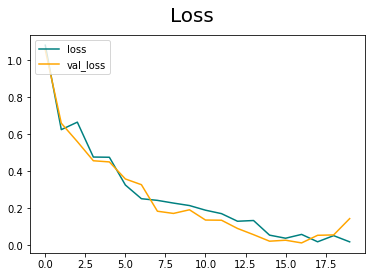

In [47]:
# Plot Performance

fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


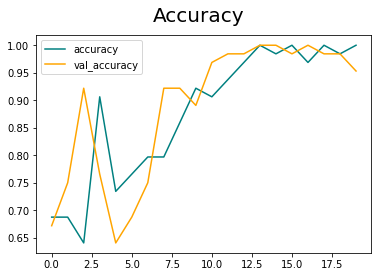

In [48]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color ='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
# Evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [50]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [51]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 0s 67ms/step


In [52]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9459459, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9574468, shape=(), dtype=float32)


In [53]:
# Test
import cv2

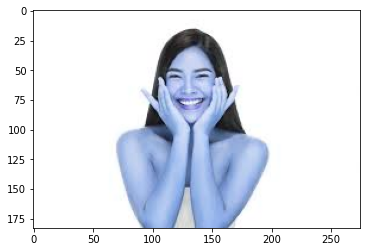

In [54]:
img = cv2.imread('ss.jpeg')
plt.imshow(img)
plt.show()

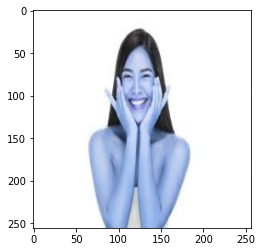

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 14ms/step


In [57]:
yhat

array([[0.9999993]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted Class is Bald') 
else:
    print(f'Predicted Class is Bald') 
